# Implementing Adam Optimizer from scratch



Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

Adaptive Gradient Algorithm (AdaGrad) 
Root Mean Square Propagation (RMSPROP)

- Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the
second moments of the gradients (the uncentered variance).
-   algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2
control the decay rates of these moving averages.



In [2]:
## Importing the libraries

from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot



In [4]:
# Defining objective function

def objective (x,y) :
    return x** 2.0 + y**2.0


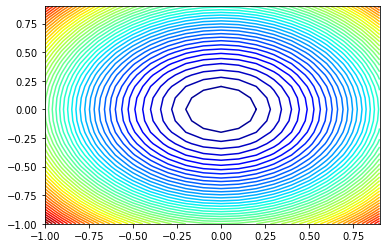

In [6]:
# plot the objective function



# define range of input

bounds = asarray([[-1.0, 1.0],[-1.0, 1.0]])
# sample input range uniformly at 0.1 increments

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh for the axis
x, y = meshgrid (xaxis, yaxis)

# compute targets

results = objective(x,y)

# create a filled contour plot with 50 levels and jet color scheme

pyplot.contour(x, y, results, levels = 50,cmap = 'jet')

pyplot.show()




Note : The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero.
This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates.

# How this algorithm works : Pseudo code

###   select a random point in the bounds of the problem as a starting point for the search
#### generate an initial point
x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
score = objective(x[0], x[1])

#### initialize first and second moments
m = [0.0 for _ in range(bounds.shape[0])]
v = [0.0 for _ in range(bounds.shape[0])]

### Run  fixed number of iterations of gradient descent

### Calculate gradient
gradient = derivative(solution[0], solution[1])

### Calculate gradient g(t) # derivative of the current set of parameters
g = derivative(x[0], x[1])

### First moment m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]

###second moment
#### v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
    
### Bias correction
 mhat(t) = m(t) / (1 - beta1(t))
mhat = m[i] / (1.0 - beta1**(t+1))
#### vhat(t) = v(t) / (1 - beta2(t))
vhat = v[i] / (1.0 - beta2**(t+1))

#### The updated variable
 x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
    
### This is repeated for each parameter that is being optimised


In [ ]:
# implementing the algorithm

# derivative of the objective function


def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 

# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]
                           
    



In [10]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(